# Diagnosis of Breast Cancer

In this laboration we will try to diagnose breast cancer as Benign (not harmful) and Malignant (potentially harmfull). The dataset contians of quantified values of the X-ray image. The quantification of the image is part of the feature extraction which we will not focus on on this laboration. But it is a VERY important part in the ML/AI process. 

In this dataset each X-ray image has been quantified into 34 features describing the the image. The features describes the image in a manner that the Neural Net might understand, as numbers. 

Those features might be of more or less importance. It is for example likely that the id is not the best feature for classifying cancer type. To keep id is however a bad idea since it might have a strong correlation with id, for example if all cases diagnosed by id is hight. It is therefore always a good idea to remove irrelevant data from the dataset. Examples of features that might described the tumour might be, area, texture, peremiter, symmetry and smoothness of edge. 

It the following image examples of the two types of images are shown. For sure it is a difficult task to determine the type if you don't have the experience.

![alt text](https://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0141357.g005 "Example images of Benign and Malignant type cancers.")




This diagnosis could also be done on the X-ray images alone without the feature extraction. Then image analysis and convolutional neural nets could be used. But probably the the results would not be as good with this limited dataset. 

In [4]:
# First we load all libraries needed for this notebook
 
import pandas as pd # Load the Pandas libraries with alias 'pd'
import tensorflow as tf # A library developed by google making GPU calculations simple
import seaborn as sns # A nice library for plotting, alternative to matplotlib
from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [12]:
# Read data from file 'breast-cancer.csv' from the data folder
# Open the csv to see the data
data = pd.read_csv("./data/breast-cancer.csv") 
# Preview the loaded data
data.tail(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


### Delete uneccesary columns
Detect columns that are unnecesary from the dataframe and delete the by using the pop method.

If A is a dataframe with columns 'b' and 'c', column c can be deleted by  
``` A.pop('b') ```

Nothing will be deleted from the csv file so if you need to load the data again just run the cell above.

Hint: Two columns should be deleted

In [13]:
data.pop('Unnamed: 32')
data.pop('id')
data.head(n=10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Visualizing the data
There are lots of vizualising libraries in python. Many of them are based on matplotlib which shares many of the syntax with matlab. In this notebook seaborn is used to get an idea of the data and see if it might be possible to separate the two diagnosis from each other.

1. Find the names of the columns by the  ``` columns ``` attribute of the dataframe and save it to a variable ``` cols ```. 
2. Delete diagnosis from the list of columns by the `drop` method.  



In [14]:
# Write the syntax here:
cols=data.columns
cols=cols.drop(['diagnosis'])
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Make two pair plots one of the first five columns and another with column number 5 to 10

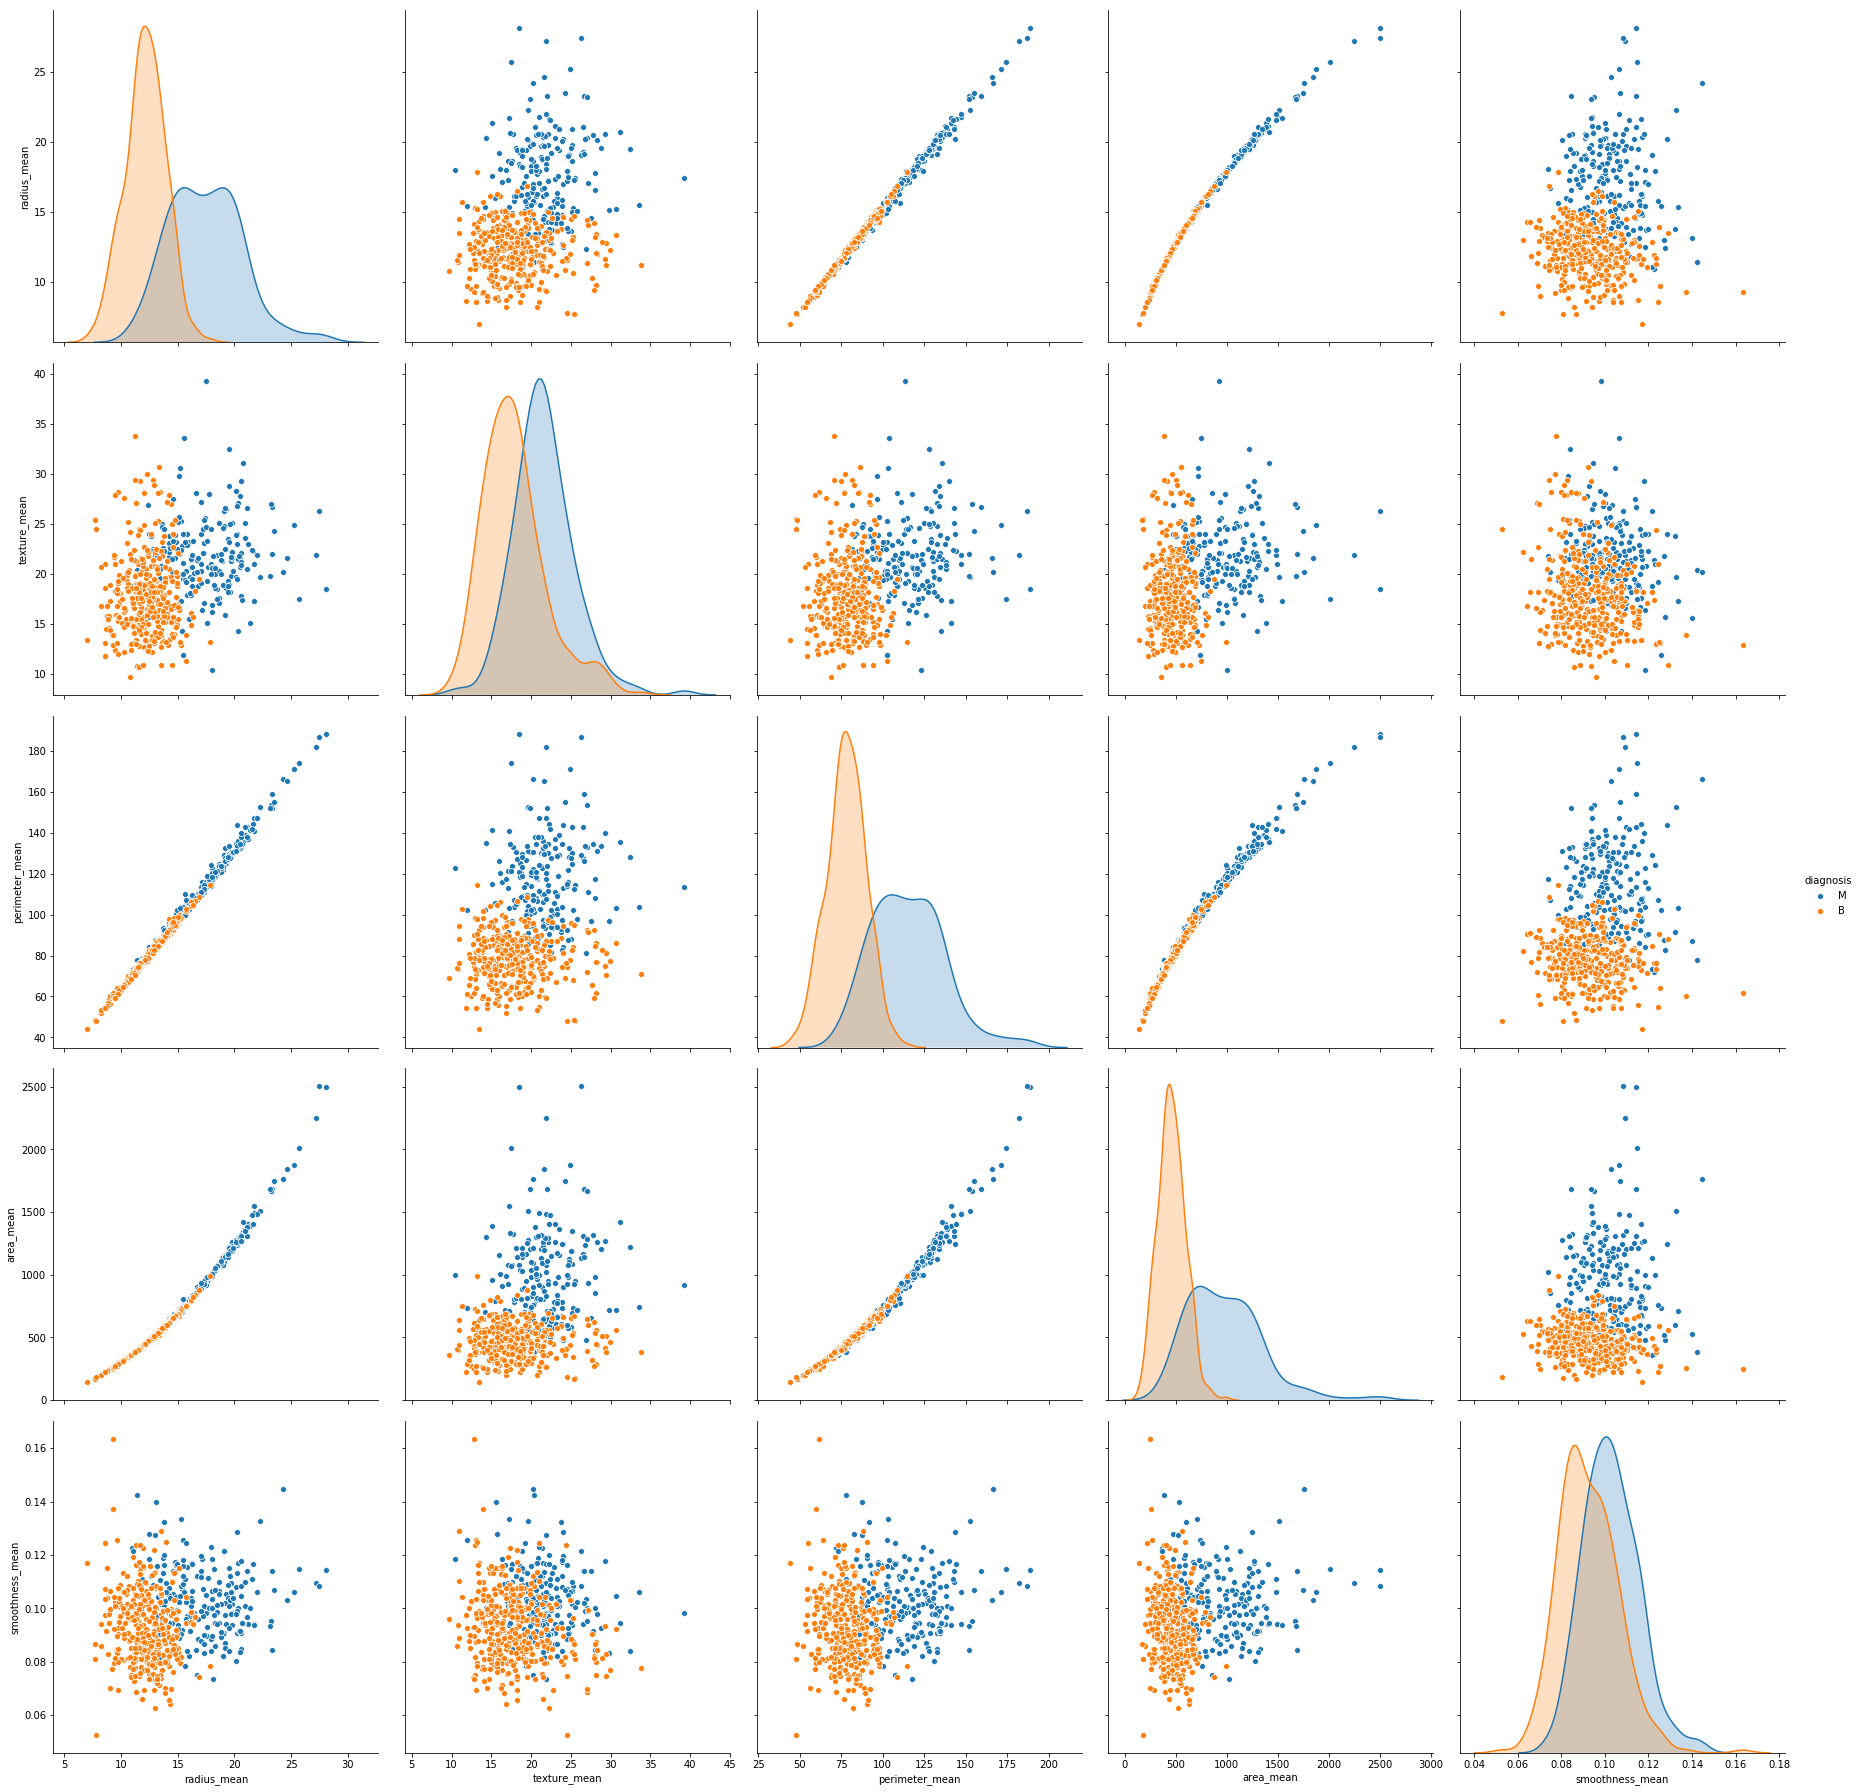

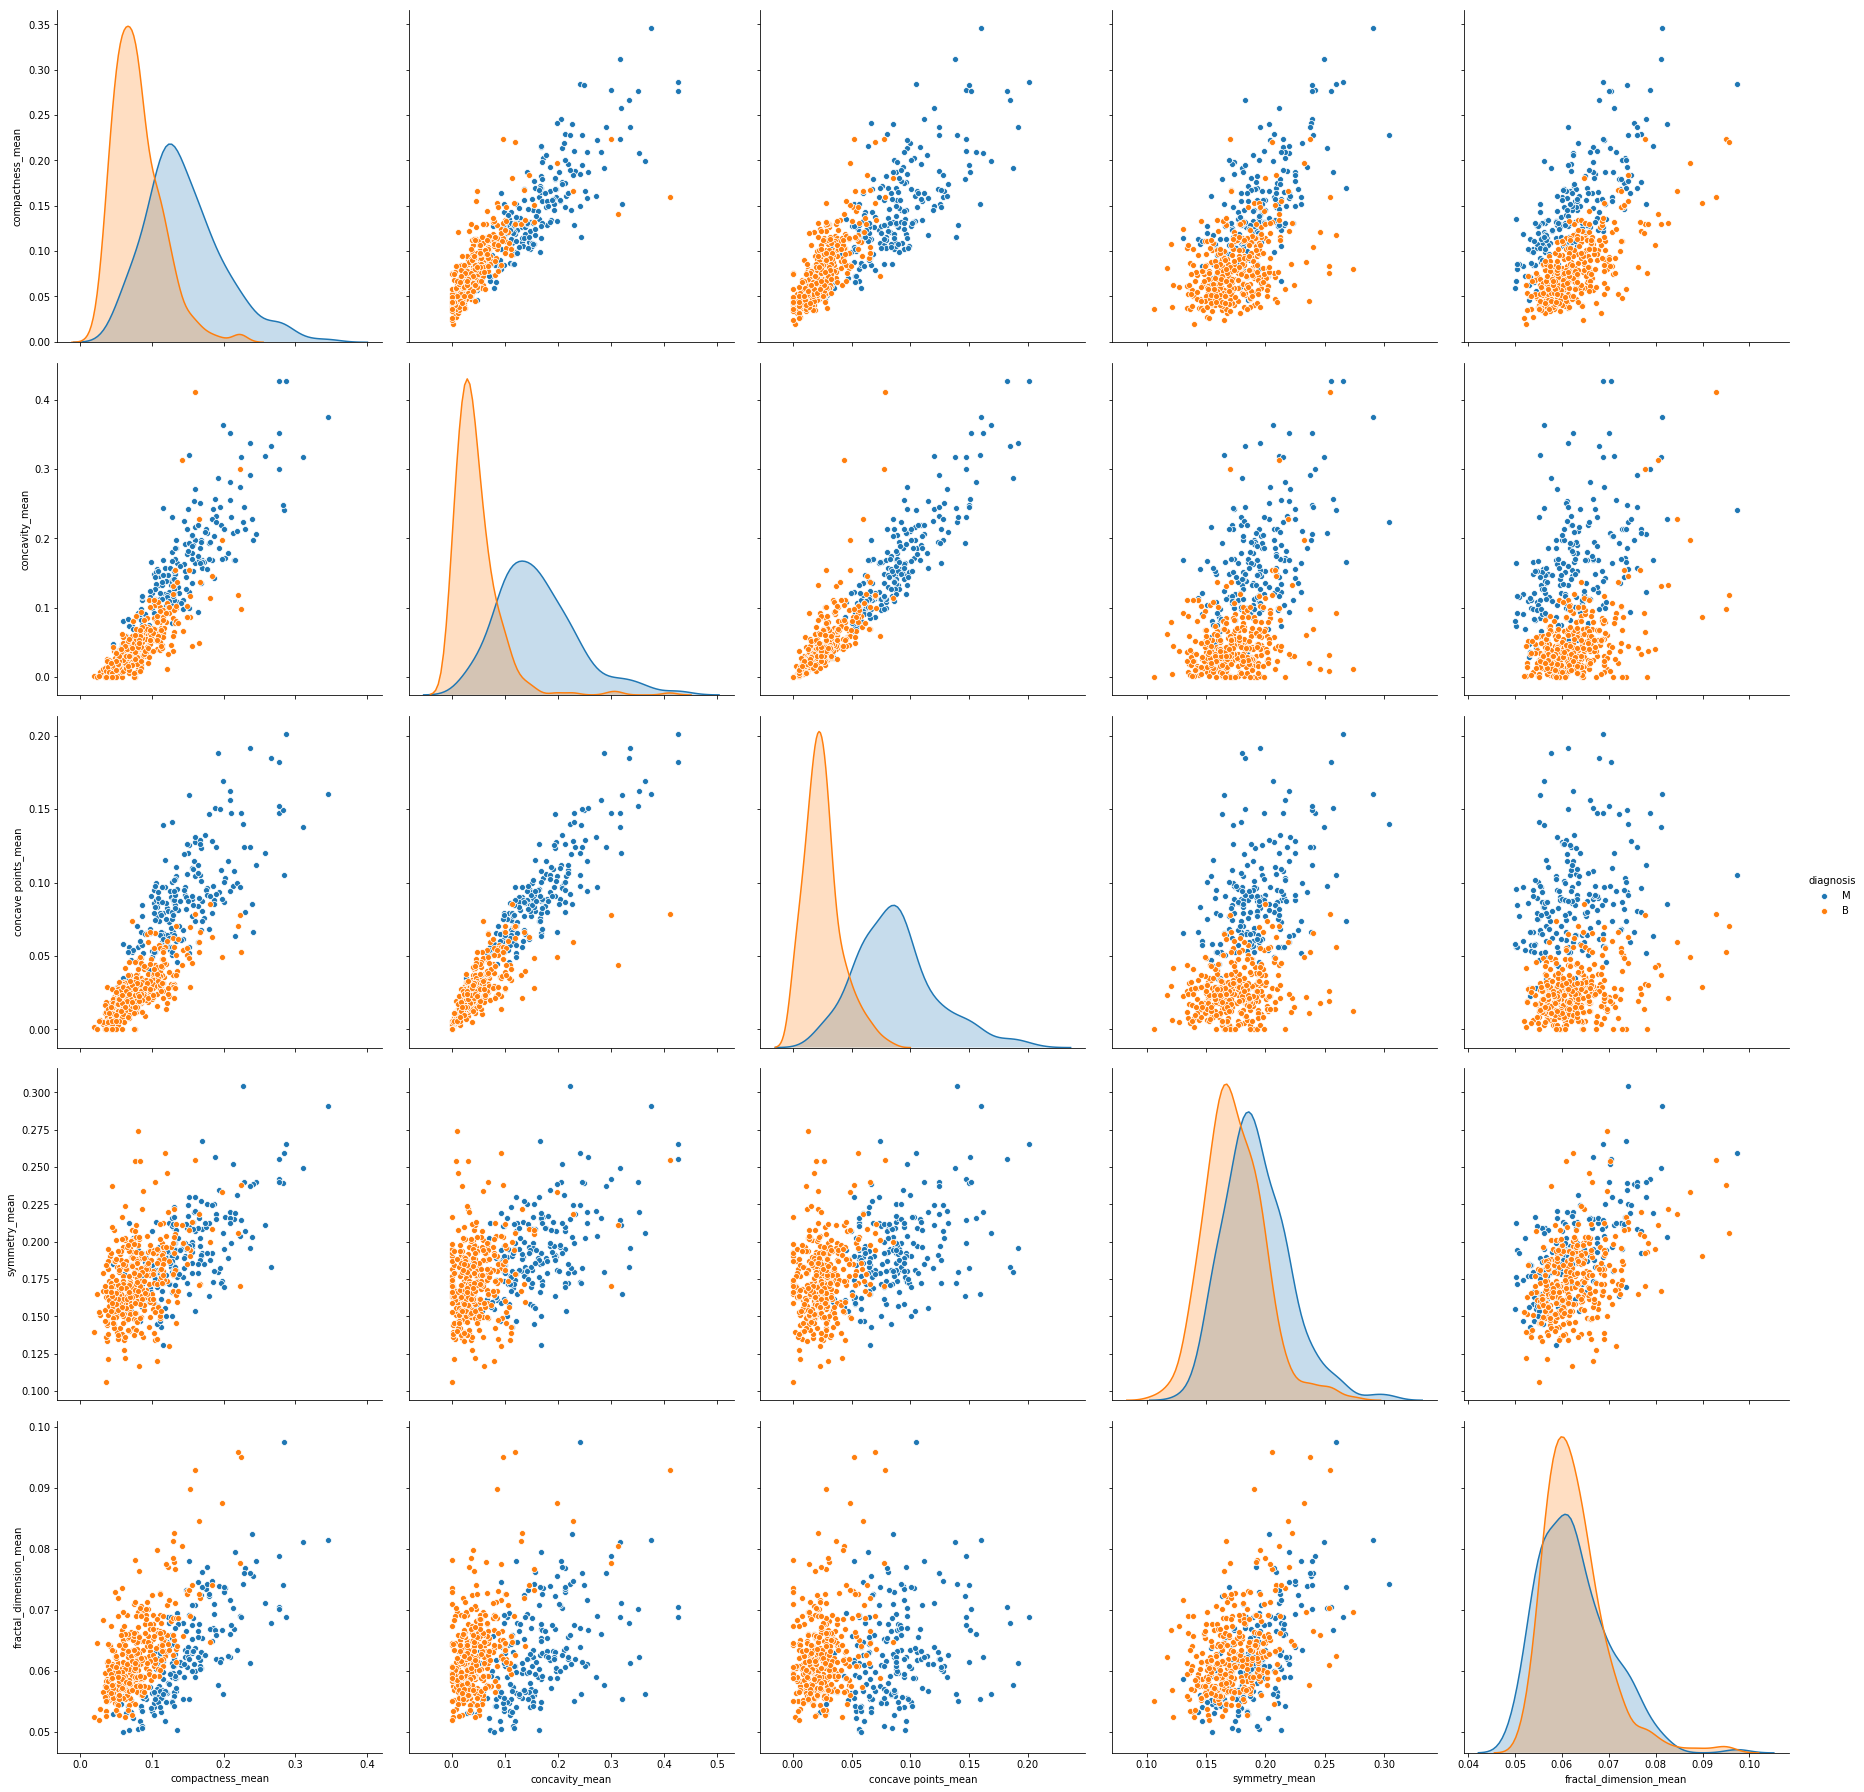

In [15]:
sns.pairplot(vars=cols[:5], data=data, hue='diagnosis', height=5)
plt.show()
sns.pairplot(vars=cols[5:10], data=data, hue='diagnosis', height=5)
plt.show()

## Creating training and test data

In [16]:
# Shuffle the data each time 
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into 
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
X_normalized = normalize(X,axis=0)

total_length = len(data)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

le = preprocessing.LabelEncoder()
le.fit(y_train)
train_label = le.transform(y_train)
y_train = tf.keras.utils.to_categorical(train_label,num_classes=2)

le2 = preprocessing.LabelEncoder()
le2.fit(y_test)
test_label = le2.transform(y_test)
y_test=tf.keras.utils.to_categorical(test_label,num_classes=2)


Create a Sequential model whith tree hidden layers. 150,500 and 300 neurons in each layer. Use 'relu' as activation function for the hidden layers and 'softmax' for the output layer. 

Store the fitting parameters from the model into a variable called `history`

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(150,input_dim=30,activation='relu'))
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/300
455/455 [==============================] - 0s 705us/sample - loss: 0.6016 - acc: 0.7670 - val_loss: 0.4030 - val_acc: 0.8596
Epoch 2/300
455/455 [==============================] - 0s 152us/sample - loss: 0.2614 - acc: 0.9231 - val_loss: 0.2019 - val_acc: 0.9123
Epoch 3/300
455/455 [==============================] - 0s 141us/sample - loss: 0.1623 - acc: 0.9319 - val_loss: 0.1345 - val_acc: 0.9386
Epoch 4/300
455/455 [==============================] - 0s 127us/sample - loss: 0.1630 - acc: 0.9275 - val_loss: 0.1334 - val_acc: 0.9561
Epoch 5/300
455/455 [==============================] - 0s 154us/sample - loss: 0.1801 - acc: 0.9495 - val_loss: 0.1243 - val_acc: 0.9561
Epoch 6/300
455/455 [==============================] - 0s 136us/sample - loss: 0.1239 - acc: 0.9582 - val_loss: 0.1194 - val_acc: 0.9386
Epoch 7/300
455/455 [==============================] - 0s 156us/sample - loss: 0.1157 - acc: 0.9670 - val_loss: 0.0920 - val_acc: 0.

455/455 [==============================] - 0s 158us/sample - loss: 0.0600 - acc: 0.9692 - val_loss: 0.1592 - val_acc: 0.9561
Epoch 61/300
455/455 [==============================] - 0s 159us/sample - loss: 0.0928 - acc: 0.9626 - val_loss: 0.0444 - val_acc: 0.9737
Epoch 62/300
455/455 [==============================] - 0s 193us/sample - loss: 0.0583 - acc: 0.9692 - val_loss: 0.0481 - val_acc: 0.9825
Epoch 63/300
455/455 [==============================] - 0s 171us/sample - loss: 0.0607 - acc: 0.9758 - val_loss: 0.0502 - val_acc: 0.9737
Epoch 64/300
455/455 [==============================] - 0s 123us/sample - loss: 0.0509 - acc: 0.9824 - val_loss: 0.0512 - val_acc: 0.9825
Epoch 65/300
455/455 [==============================] - 0s 114us/sample - loss: 0.0432 - acc: 0.9890 - val_loss: 0.1179 - val_acc: 0.9561
Epoch 66/300
455/455 [==============================] - 0s 127us/sample - loss: 0.0643 - acc: 0.9692 - val_loss: 0.0519 - val_acc: 0.9825
Epoch 67/300
455/455 [=========================

455/455 [==============================] - 0s 130us/sample - loss: 0.0291 - acc: 0.9890 - val_loss: 0.1141 - val_acc: 0.9649
Epoch 120/300
455/455 [==============================] - 0s 118us/sample - loss: 0.0239 - acc: 0.9890 - val_loss: 0.1858 - val_acc: 0.9474
Epoch 121/300
455/455 [==============================] - 0s 116us/sample - loss: 0.0561 - acc: 0.9758 - val_loss: 0.2029 - val_acc: 0.9474
Epoch 122/300
455/455 [==============================] - 0s 127us/sample - loss: 0.0501 - acc: 0.9824 - val_loss: 0.1035 - val_acc: 0.9474
Epoch 123/300
455/455 [==============================] - 0s 124us/sample - loss: 0.0429 - acc: 0.9846 - val_loss: 0.0573 - val_acc: 0.9825
Epoch 124/300
455/455 [==============================] - 0s 121us/sample - loss: 0.0624 - acc: 0.9780 - val_loss: 0.0653 - val_acc: 0.9737
Epoch 125/300
455/455 [==============================] - 0s 121us/sample - loss: 0.0341 - acc: 0.9868 - val_loss: 0.0704 - val_acc: 0.9649
Epoch 126/300
455/455 [==================

Epoch 178/300
455/455 [==============================] - 0s 128us/sample - loss: 0.0425 - acc: 0.9846 - val_loss: 0.0881 - val_acc: 0.9737
Epoch 179/300
455/455 [==============================] - 0s 130us/sample - loss: 0.0308 - acc: 0.9846 - val_loss: 0.1436 - val_acc: 0.9649
Epoch 180/300
455/455 [==============================] - 0s 125us/sample - loss: 0.0238 - acc: 0.9934 - val_loss: 0.1010 - val_acc: 0.9737
Epoch 181/300
455/455 [==============================] - 0s 125us/sample - loss: 0.0223 - acc: 0.9912 - val_loss: 0.0876 - val_acc: 0.9825
Epoch 182/300
455/455 [==============================] - 0s 121us/sample - loss: 0.0479 - acc: 0.9802 - val_loss: 0.1135 - val_acc: 0.9649
Epoch 183/300
455/455 [==============================] - 0s 133us/sample - loss: 0.0316 - acc: 0.9868 - val_loss: 0.1138 - val_acc: 0.9649
Epoch 184/300
455/455 [==============================] - 0s 125us/sample - loss: 0.0218 - acc: 0.9956 - val_loss: 0.1736 - val_acc: 0.9649
Epoch 185/300
455/455 [====

Epoch 237/300
455/455 [==============================] - 0s 119us/sample - loss: 0.0515 - acc: 0.9846 - val_loss: 0.2636 - val_acc: 0.9649
Epoch 238/300
455/455 [==============================] - 0s 123us/sample - loss: 0.0239 - acc: 0.9934 - val_loss: 0.2919 - val_acc: 0.9649
Epoch 239/300
455/455 [==============================] - 0s 124us/sample - loss: 0.0188 - acc: 0.9934 - val_loss: 0.2552 - val_acc: 0.9649
Epoch 240/300
455/455 [==============================] - 0s 119us/sample - loss: 0.0176 - acc: 0.9956 - val_loss: 0.1206 - val_acc: 0.9561
Epoch 241/300
455/455 [==============================] - 0s 123us/sample - loss: 0.0226 - acc: 0.9934 - val_loss: 0.1614 - val_acc: 0.9737
Epoch 242/300
455/455 [==============================] - 0s 112us/sample - loss: 0.0245 - acc: 0.9890 - val_loss: 0.2643 - val_acc: 0.9561
Epoch 243/300
455/455 [==============================] - 0s 114us/sample - loss: 0.0426 - acc: 0.9846 - val_loss: 0.2034 - val_acc: 0.9649
Epoch 244/300
455/455 [====

Epoch 296/300
455/455 [==============================] - 0s 119us/sample - loss: 0.0166 - acc: 0.9934 - val_loss: 0.0618 - val_acc: 0.9737
Epoch 297/300
455/455 [==============================] - 0s 116us/sample - loss: 0.0230 - acc: 0.9868 - val_loss: 0.1399 - val_acc: 0.9649
Epoch 298/300
455/455 [==============================] - 0s 112us/sample - loss: 0.1244 - acc: 0.9648 - val_loss: 0.0822 - val_acc: 0.9649
Epoch 299/300
455/455 [==============================] - 0s 117us/sample - loss: 0.0482 - acc: 0.9780 - val_loss: 0.0875 - val_acc: 0.9737
Epoch 300/300
455/455 [==============================] - 0s 129us/sample - loss: 0.0234 - acc: 0.9934 - val_loss: 0.0825 - val_acc: 0.9737


#### Validate results
By looking at the output from the model fit. We can se that the accuracy of training data keeps raising through the process of finding constants for each neuron in the net. However looking att the accuracy of the validation set there is some kind of maximum after quite few iteration. 

We can find a reasonable high amount epochs by plotting the history of the accuracy and loss. 

What is a reasonable amount of epochs?

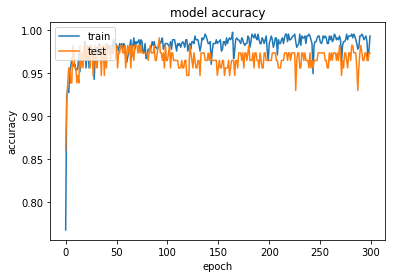

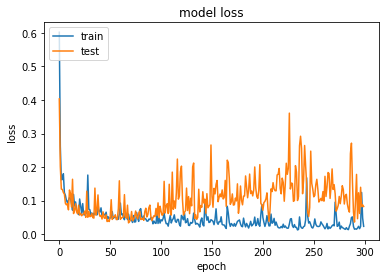

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Better net?
In the example above there are quite a lot of neurons in each layer of the net and the training proceduce goes on for quite a lot of iterations. This can cause overtraining which happends when the model is fitted to the training data in a way that it start to be unrealistic. Questions to reflect on in order to reduce overtraining:
* When do we start to se overtraining.
* How can overtraining be avoided
* Do we see any diffrence in the loss and accuracy? 
* What is a reasonable amount if neurons. 

Train on 455 samples, validate on 114 samples
Epoch 1/300
455/455 [==============================] - 0s 798us/sample - loss: 0.6867 - acc: 0.6176 - val_loss: 0.6761 - val_acc: 0.7105
Epoch 2/300
455/455 [==============================] - 0s 72us/sample - loss: 0.6684 - acc: 0.6681 - val_loss: 0.6483 - val_acc: 0.7018
Epoch 3/300
455/455 [==============================] - 0s 85us/sample - loss: 0.6374 - acc: 0.7011 - val_loss: 0.6028 - val_acc: 0.7632
Epoch 4/300
455/455 [==============================] - 0s 80us/sample - loss: 0.5887 - acc: 0.7560 - val_loss: 0.5337 - val_acc: 0.8333
Epoch 5/300
455/455 [==============================] - 0s 104us/sample - loss: 0.5161 - acc: 0.8264 - val_loss: 0.4468 - val_acc: 0.8860
Epoch 6/300
455/455 [==============================] - 0s 77us/sample - loss: 0.4300 - acc: 0.8725 - val_loss: 0.3688 - val_acc: 0.9123
Epoch 7/300
455/455 [==============================] - 0s 86us/sample - loss: 0.3577 - acc: 0.8923 - val_loss: 0.2879 - val_acc: 0.8947


455/455 [==============================] - 0s 90us/sample - loss: 0.0987 - acc: 0.9648 - val_loss: 0.0552 - val_acc: 0.9825
Epoch 61/300
455/455 [==============================] - 0s 84us/sample - loss: 0.0931 - acc: 0.9758 - val_loss: 0.0542 - val_acc: 0.9649
Epoch 62/300
455/455 [==============================] - 0s 68us/sample - loss: 0.0945 - acc: 0.9692 - val_loss: 0.0648 - val_acc: 0.9825
Epoch 63/300
455/455 [==============================] - 0s 72us/sample - loss: 0.0808 - acc: 0.9648 - val_loss: 0.0476 - val_acc: 0.9825
Epoch 64/300
455/455 [==============================] - 0s 73us/sample - loss: 0.0883 - acc: 0.9692 - val_loss: 0.0553 - val_acc: 0.9825
Epoch 65/300
455/455 [==============================] - 0s 66us/sample - loss: 0.0841 - acc: 0.9714 - val_loss: 0.0565 - val_acc: 0.9649
Epoch 66/300
455/455 [==============================] - 0s 68us/sample - loss: 0.0940 - acc: 0.9670 - val_loss: 0.0472 - val_acc: 0.9912
Epoch 67/300
455/455 [==============================] 

455/455 [==============================] - 0s 81us/sample - loss: 0.0753 - acc: 0.9824 - val_loss: 0.0461 - val_acc: 0.9649
Epoch 120/300
455/455 [==============================] - 0s 77us/sample - loss: 0.0615 - acc: 0.9802 - val_loss: 0.0356 - val_acc: 0.9825
Epoch 121/300
455/455 [==============================] - 0s 72us/sample - loss: 0.0667 - acc: 0.9824 - val_loss: 0.0404 - val_acc: 0.9825
Epoch 122/300
455/455 [==============================] - 0s 66us/sample - loss: 0.0638 - acc: 0.9802 - val_loss: 0.0338 - val_acc: 0.9825
Epoch 123/300
455/455 [==============================] - 0s 68us/sample - loss: 0.0716 - acc: 0.9780 - val_loss: 0.0444 - val_acc: 0.9737
Epoch 124/300
455/455 [==============================] - 0s 68us/sample - loss: 0.0734 - acc: 0.9780 - val_loss: 0.0549 - val_acc: 0.9825
Epoch 125/300
455/455 [==============================] - 0s 78us/sample - loss: 0.0680 - acc: 0.9736 - val_loss: 0.0367 - val_acc: 0.9912
Epoch 126/300
455/455 [=========================

455/455 [==============================] - 0s 77us/sample - loss: 0.0579 - acc: 0.9912 - val_loss: 0.0368 - val_acc: 0.9737
Epoch 179/300
455/455 [==============================] - 0s 72us/sample - loss: 0.0444 - acc: 0.9868 - val_loss: 0.0347 - val_acc: 0.9737
Epoch 180/300
455/455 [==============================] - 0s 73us/sample - loss: 0.0488 - acc: 0.9846 - val_loss: 0.0328 - val_acc: 0.9912
Epoch 181/300
455/455 [==============================] - 0s 77us/sample - loss: 0.0793 - acc: 0.9780 - val_loss: 0.0429 - val_acc: 0.9737
Epoch 182/300
455/455 [==============================] - 0s 70us/sample - loss: 0.0630 - acc: 0.9758 - val_loss: 0.0311 - val_acc: 0.9737
Epoch 183/300
455/455 [==============================] - 0s 68us/sample - loss: 0.0528 - acc: 0.9846 - val_loss: 0.0286 - val_acc: 0.9912
Epoch 184/300
455/455 [==============================] - 0s 64us/sample - loss: 0.0611 - acc: 0.9846 - val_loss: 0.0498 - val_acc: 0.9737
Epoch 185/300
455/455 [=========================

455/455 [==============================] - 0s 70us/sample - loss: 0.0552 - acc: 0.9912 - val_loss: 0.0431 - val_acc: 0.9825
Epoch 238/300
455/455 [==============================] - 0s 77us/sample - loss: 0.0539 - acc: 0.9846 - val_loss: 0.0405 - val_acc: 0.9825
Epoch 239/300
455/455 [==============================] - 0s 72us/sample - loss: 0.0574 - acc: 0.9824 - val_loss: 0.0332 - val_acc: 0.9912
Epoch 240/300
455/455 [==============================] - 0s 76us/sample - loss: 0.0456 - acc: 0.9890 - val_loss: 0.0529 - val_acc: 0.9737
Epoch 241/300
455/455 [==============================] - 0s 94us/sample - loss: 0.0576 - acc: 0.9846 - val_loss: 0.0356 - val_acc: 0.9825
Epoch 242/300
455/455 [==============================] - 0s 94us/sample - loss: 0.0480 - acc: 0.9890 - val_loss: 0.0384 - val_acc: 0.9912
Epoch 243/300
455/455 [==============================] - 0s 83us/sample - loss: 0.0528 - acc: 0.9846 - val_loss: 0.0338 - val_acc: 0.9825
Epoch 244/300
455/455 [=========================

455/455 [==============================] - 0s 81us/sample - loss: 0.0506 - acc: 0.9824 - val_loss: 0.0397 - val_acc: 0.9825
Epoch 297/300
455/455 [==============================] - 0s 70us/sample - loss: 0.0405 - acc: 0.9868 - val_loss: 0.0448 - val_acc: 0.9825
Epoch 298/300
455/455 [==============================] - 0s 79us/sample - loss: 0.0415 - acc: 0.9890 - val_loss: 0.0447 - val_acc: 0.9825
Epoch 299/300
455/455 [==============================] - 0s 75us/sample - loss: 0.0422 - acc: 0.9912 - val_loss: 0.0482 - val_acc: 0.9737
Epoch 300/300
455/455 [==============================] - 0s 66us/sample - loss: 0.0388 - acc: 0.9890 - val_loss: 0.0493 - val_acc: 0.9737


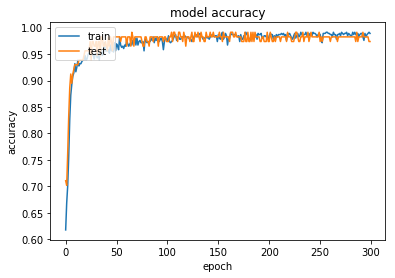

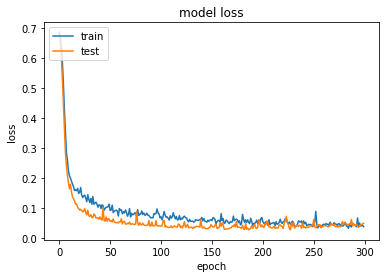

In [19]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(24,input_dim=30,activation='relu'))
model2.add(tf.keras.layers.Dense(20,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(2,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)

# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 455 samples, validate on 114 samples
Epoch 1/300
455/455 [==============================] - 0s 577us/sample - loss: 0.6870 - acc: 0.6176 - val_loss: 0.6770 - val_acc: 0.6316
Epoch 2/300
455/455 [==============================] - 0s 63us/sample - loss: 0.6800 - acc: 0.6440 - val_loss: 0.6672 - val_acc: 0.6404
Epoch 3/300
455/455 [==============================] - 0s 90us/sample - loss: 0.6710 - acc: 0.6374 - val_loss: 0.6566 - val_acc: 0.6491
Epoch 4/300
455/455 [==============================] - 0s 69us/sample - loss: 0.6565 - acc: 0.6396 - val_loss: 0.6480 - val_acc: 0.6491
Epoch 5/300
455/455 [==============================] - 0s 79us/sample - loss: 0.6495 - acc: 0.6396 - val_loss: 0.6396 - val_acc: 0.6491
Epoch 6/300
455/455 [==============================] - 0s 72us/sample - loss: 0.6434 - acc: 0.6418 - val_loss: 0.6317 - val_acc: 0.6491
Epoch 7/300
455/455 [==============================] - 0s 81us/sample - loss: 0.6397 - acc: 0.6505 - val_loss: 0.6240 - val_acc: 0.6491
E

455/455 [==============================] - 0s 58us/sample - loss: 0.3156 - acc: 0.8593 - val_loss: 0.2774 - val_acc: 0.9035
Epoch 61/300
455/455 [==============================] - 0s 66us/sample - loss: 0.3190 - acc: 0.8571 - val_loss: 0.2744 - val_acc: 0.9035
Epoch 62/300
455/455 [==============================] - 0s 55us/sample - loss: 0.3356 - acc: 0.8418 - val_loss: 0.2721 - val_acc: 0.8947
Epoch 63/300
455/455 [==============================] - 0s 61us/sample - loss: 0.2959 - acc: 0.8945 - val_loss: 0.2687 - val_acc: 0.9035
Epoch 64/300
455/455 [==============================] - 0s 59us/sample - loss: 0.3098 - acc: 0.8659 - val_loss: 0.2659 - val_acc: 0.9035
Epoch 65/300
455/455 [==============================] - 0s 55us/sample - loss: 0.3011 - acc: 0.8571 - val_loss: 0.2629 - val_acc: 0.9035
Epoch 66/300
455/455 [==============================] - 0s 59us/sample - loss: 0.3127 - acc: 0.8396 - val_loss: 0.2602 - val_acc: 0.9035
Epoch 67/300
455/455 [==============================] 

455/455 [==============================] - 0s 60us/sample - loss: 0.2421 - acc: 0.8857 - val_loss: 0.1729 - val_acc: 0.9211
Epoch 120/300
455/455 [==============================] - 0s 61us/sample - loss: 0.2363 - acc: 0.9099 - val_loss: 0.1711 - val_acc: 0.9211
Epoch 121/300
455/455 [==============================] - 0s 59us/sample - loss: 0.2313 - acc: 0.9187 - val_loss: 0.1695 - val_acc: 0.9211
Epoch 122/300
455/455 [==============================] - 0s 57us/sample - loss: 0.2320 - acc: 0.9187 - val_loss: 0.1679 - val_acc: 0.9211
Epoch 123/300
455/455 [==============================] - 0s 55us/sample - loss: 0.2197 - acc: 0.9231 - val_loss: 0.1650 - val_acc: 0.9211
Epoch 124/300
455/455 [==============================] - 0s 61us/sample - loss: 0.2251 - acc: 0.9011 - val_loss: 0.1635 - val_acc: 0.9211
Epoch 125/300
455/455 [==============================] - 0s 59us/sample - loss: 0.2386 - acc: 0.9187 - val_loss: 0.1636 - val_acc: 0.9211
Epoch 126/300
455/455 [=========================

455/455 [==============================] - 0s 55us/sample - loss: 0.2002 - acc: 0.9099 - val_loss: 0.1229 - val_acc: 0.9386
Epoch 179/300
455/455 [==============================] - 0s 54us/sample - loss: 0.1989 - acc: 0.9187 - val_loss: 0.1225 - val_acc: 0.9386
Epoch 180/300
455/455 [==============================] - 0s 61us/sample - loss: 0.2091 - acc: 0.9209 - val_loss: 0.1226 - val_acc: 0.9386
Epoch 181/300
455/455 [==============================] - 0s 50us/sample - loss: 0.1999 - acc: 0.9121 - val_loss: 0.1224 - val_acc: 0.9474
Epoch 182/300
455/455 [==============================] - 0s 48us/sample - loss: 0.2018 - acc: 0.9275 - val_loss: 0.1216 - val_acc: 0.9386
Epoch 183/300
455/455 [==============================] - ETA: 0s - loss: 0.2466 - acc: 0.900 - 0s 55us/sample - loss: 0.1928 - acc: 0.9209 - val_loss: 0.1209 - val_acc: 0.9474
Epoch 184/300
455/455 [==============================] - 0s 57us/sample - loss: 0.1944 - acc: 0.9143 - val_loss: 0.1200 - val_acc: 0.9474
Epoch 185/

455/455 [==============================] - 0s 59us/sample - loss: 0.1819 - acc: 0.9319 - val_loss: 0.0992 - val_acc: 0.9386
Epoch 238/300
455/455 [==============================] - 0s 55us/sample - loss: 0.1636 - acc: 0.9495 - val_loss: 0.0986 - val_acc: 0.9386
Epoch 239/300
455/455 [==============================] - 0s 57us/sample - loss: 0.1695 - acc: 0.9341 - val_loss: 0.0980 - val_acc: 0.9474
Epoch 240/300
455/455 [==============================] - 0s 59us/sample - loss: 0.1682 - acc: 0.9341 - val_loss: 0.0979 - val_acc: 0.9474
Epoch 241/300
455/455 [==============================] - 0s 61us/sample - loss: 0.1825 - acc: 0.9253 - val_loss: 0.0980 - val_acc: 0.9386
Epoch 242/300
455/455 [==============================] - 0s 64us/sample - loss: 0.1757 - acc: 0.9297 - val_loss: 0.0973 - val_acc: 0.9474
Epoch 243/300
455/455 [==============================] - 0s 57us/sample - loss: 0.1857 - acc: 0.9363 - val_loss: 0.0978 - val_acc: 0.9561
Epoch 244/300
455/455 [=========================

455/455 [==============================] - 0s 59us/sample - loss: 0.1643 - acc: 0.9407 - val_loss: 0.0878 - val_acc: 0.9561
Epoch 297/300
455/455 [==============================] - 0s 55us/sample - loss: 0.1598 - acc: 0.9187 - val_loss: 0.0872 - val_acc: 0.9649
Epoch 298/300
455/455 [==============================] - 0s 58us/sample - loss: 0.1857 - acc: 0.9187 - val_loss: 0.0871 - val_acc: 0.9737
Epoch 299/300
455/455 [==============================] - 0s 55us/sample - loss: 0.1814 - acc: 0.9143 - val_loss: 0.0870 - val_acc: 0.9737
Epoch 300/300
455/455 [==============================] - 0s 59us/sample - loss: 0.1683 - acc: 0.9341 - val_loss: 0.0869 - val_acc: 0.9737


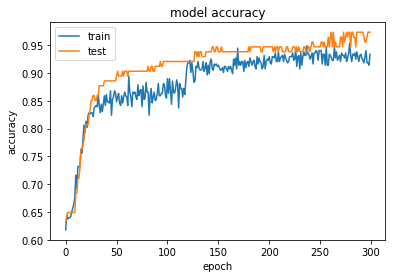

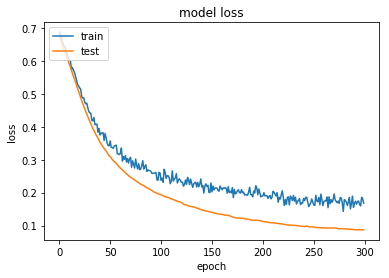

Train on 455 samples, validate on 114 samples
Epoch 1/300
455/455 [==============================] - 0s 482us/sample - loss: 0.7347 - acc: 0.3780 - val_loss: 0.7344 - val_acc: 0.3509
Epoch 2/300
455/455 [==============================] - 0s 57us/sample - loss: 0.7233 - acc: 0.3780 - val_loss: 0.7227 - val_acc: 0.3509
Epoch 3/300
455/455 [==============================] - 0s 55us/sample - loss: 0.7139 - acc: 0.3780 - val_loss: 0.7121 - val_acc: 0.3509
Epoch 4/300
455/455 [==============================] - 0s 60us/sample - loss: 0.7055 - acc: 0.3780 - val_loss: 0.7030 - val_acc: 0.3509
Epoch 5/300
455/455 [==============================] - 0s 55us/sample - loss: 0.6987 - acc: 0.3780 - val_loss: 0.6953 - val_acc: 0.3509
Epoch 6/300
455/455 [==============================] - 0s 59us/sample - loss: 0.6926 - acc: 0.5143 - val_loss: 0.6892 - val_acc: 0.6491
Epoch 7/300
455/455 [==============================] - 0s 61us/sample - loss: 0.6879 - acc: 0.6220 - val_loss: 0.6833 - val_acc: 0.6491
E

455/455 [==============================] - 0s 57us/sample - loss: 0.6559 - acc: 0.6220 - val_loss: 0.6440 - val_acc: 0.6491
Epoch 61/300
455/455 [==============================] - 0s 64us/sample - loss: 0.6555 - acc: 0.6220 - val_loss: 0.6437 - val_acc: 0.6491
Epoch 62/300
455/455 [==============================] - 0s 64us/sample - loss: 0.6552 - acc: 0.6220 - val_loss: 0.6435 - val_acc: 0.6491
Epoch 63/300
455/455 [==============================] - 0s 50us/sample - loss: 0.6546 - acc: 0.6220 - val_loss: 0.6428 - val_acc: 0.6491
Epoch 64/300
455/455 [==============================] - 0s 50us/sample - loss: 0.6541 - acc: 0.6220 - val_loss: 0.6425 - val_acc: 0.6491
Epoch 65/300
455/455 [==============================] - 0s 58us/sample - loss: 0.6535 - acc: 0.6220 - val_loss: 0.6420 - val_acc: 0.6491
Epoch 66/300
455/455 [==============================] - 0s 59us/sample - loss: 0.6530 - acc: 0.6220 - val_loss: 0.6415 - val_acc: 0.6491
Epoch 67/300
455/455 [==============================] 

Epoch 120/300
455/455 [==============================] - 0s 54us/sample - loss: 0.5848 - acc: 0.6857 - val_loss: 0.5758 - val_acc: 0.6930
Epoch 121/300
455/455 [==============================] - 0s 48us/sample - loss: 0.5828 - acc: 0.6857 - val_loss: 0.5738 - val_acc: 0.7105
Epoch 122/300
455/455 [==============================] - 0s 48us/sample - loss: 0.5808 - acc: 0.6857 - val_loss: 0.5720 - val_acc: 0.7193
Epoch 123/300
455/455 [==============================] - 0s 55us/sample - loss: 0.5788 - acc: 0.6945 - val_loss: 0.5700 - val_acc: 0.7193
Epoch 124/300
455/455 [==============================] - 0s 53us/sample - loss: 0.5770 - acc: 0.6945 - val_loss: 0.5679 - val_acc: 0.7193
Epoch 125/300
455/455 [==============================] - 0s 55us/sample - loss: 0.5750 - acc: 0.7033 - val_loss: 0.5661 - val_acc: 0.7281
Epoch 126/300
455/455 [==============================] - 0s 53us/sample - loss: 0.5728 - acc: 0.7033 - val_loss: 0.5640 - val_acc: 0.7281
Epoch 127/300
455/455 [===========

455/455 [==============================] - 0s 56us/sample - loss: 0.4545 - acc: 0.8835 - val_loss: 0.4507 - val_acc: 0.8684
Epoch 180/300
455/455 [==============================] - 0s 57us/sample - loss: 0.4524 - acc: 0.8835 - val_loss: 0.4486 - val_acc: 0.8684
Epoch 181/300
455/455 [==============================] - 0s 53us/sample - loss: 0.4502 - acc: 0.8857 - val_loss: 0.4466 - val_acc: 0.8684
Epoch 182/300
455/455 [==============================] - 0s 53us/sample - loss: 0.4481 - acc: 0.8857 - val_loss: 0.4447 - val_acc: 0.8772
Epoch 183/300
455/455 [==============================] - 0s 61us/sample - loss: 0.4459 - acc: 0.8857 - val_loss: 0.4425 - val_acc: 0.8772
Epoch 184/300
455/455 [==============================] - 0s 73us/sample - loss: 0.4438 - acc: 0.8857 - val_loss: 0.4405 - val_acc: 0.8772
Epoch 185/300
455/455 [==============================] - 0s 75us/sample - loss: 0.4417 - acc: 0.8857 - val_loss: 0.4385 - val_acc: 0.8772
Epoch 186/300
455/455 [=========================

455/455 [==============================] - 0s 57us/sample - loss: 0.3461 - acc: 0.9055 - val_loss: 0.3490 - val_acc: 0.8860
Epoch 239/300
455/455 [==============================] - 0s 50us/sample - loss: 0.3446 - acc: 0.9077 - val_loss: 0.3475 - val_acc: 0.8860
Epoch 240/300
455/455 [==============================] - 0s 53us/sample - loss: 0.3432 - acc: 0.9055 - val_loss: 0.3461 - val_acc: 0.8860
Epoch 241/300
455/455 [==============================] - 0s 58us/sample - loss: 0.3416 - acc: 0.9099 - val_loss: 0.3448 - val_acc: 0.8860
Epoch 242/300
455/455 [==============================] - 0s 61us/sample - loss: 0.3402 - acc: 0.9099 - val_loss: 0.3433 - val_acc: 0.8860
Epoch 243/300
455/455 [==============================] - 0s 53us/sample - loss: 0.3388 - acc: 0.9121 - val_loss: 0.3422 - val_acc: 0.8860
Epoch 244/300
455/455 [==============================] - 0s 58us/sample - loss: 0.3372 - acc: 0.9121 - val_loss: 0.3407 - val_acc: 0.8860
Epoch 245/300
455/455 [=========================

455/455 [==============================] - 0s 60us/sample - loss: 0.2739 - acc: 0.9209 - val_loss: 0.2817 - val_acc: 0.9035
Epoch 298/300
455/455 [==============================] - 0s 55us/sample - loss: 0.2729 - acc: 0.9209 - val_loss: 0.2810 - val_acc: 0.9035
Epoch 299/300
455/455 [==============================] - 0s 59us/sample - loss: 0.2722 - acc: 0.9209 - val_loss: 0.2803 - val_acc: 0.9035
Epoch 300/300
455/455 [==============================] - 0s 57us/sample - loss: 0.2710 - acc: 0.9209 - val_loss: 0.2793 - val_acc: 0.9035


In [21]:
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(4,input_dim=30,activation='relu'))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(2,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history3 = model3.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model4=tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(1,input_dim=30,activation='sigmoid'))
model4.add(tf.keras.layers.Dense(2,activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
history4 = model4.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=300,verbose=1)



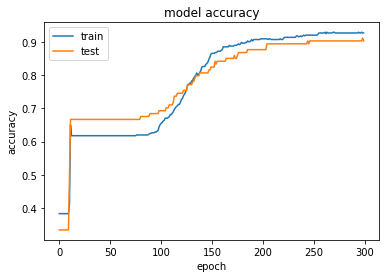

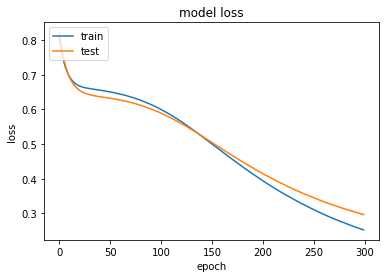

In [16]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## What is good?
Depending on application the concept of a "good" model might be very different. It might be very important to catch all Positives and it might be alright to have a few False Positives. 

One way to evaluate a binary class model is throug receiver operating characteristic curves (ROC)  and it's quantity area under curve (AUC). 




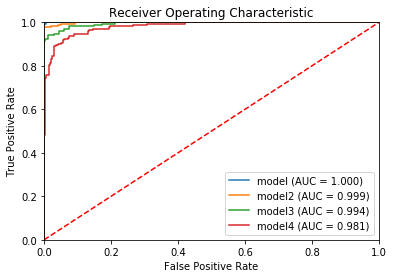

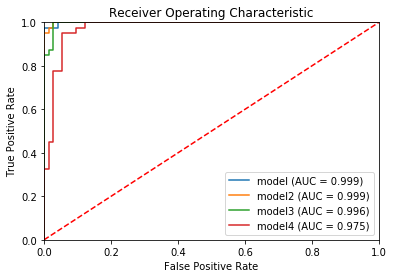

In [22]:
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

# calculate the fpr and tpr for all thresholds of the classification
models=[(model, 'model'), (model2, 'model2'), (model3, 'model3'), (model4, 'model4')]

for mod in models:
    
    probs = mod[0].predict_proba(X_train)
    
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(np.argmax(y_train,axis=1), preds)
    
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s (AUC = %0.3f)' % (mod[1],roc_auc))
    plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

for mod in models:
    probs = mod[0].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(np.argmax(y_test,axis=1), preds)
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '%s (AUC = %0.3f)' % (mod[1],roc_auc))
    plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()